# Heart Failure Prediction

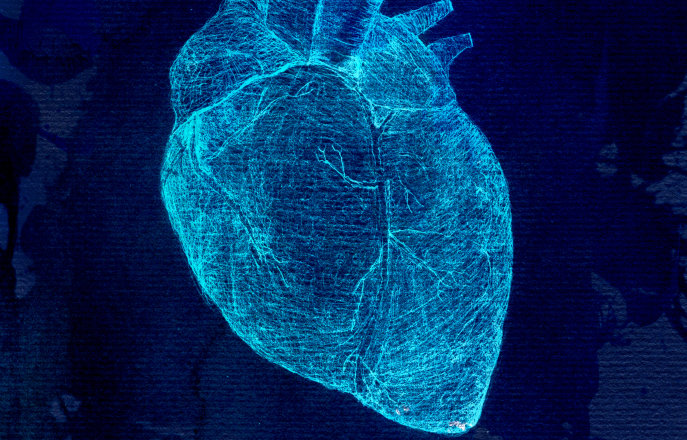

This notebook explores a dataset with multiple parameters to heart failure. The data will be visualised, then processed and finally tested against a series of classification models:
1. Linear regression
2. Random Forest
3. Decision Tree
4. SVM
5. KNeighbour Classifier
6. Gradient Boost Classifier

This time we will use principal component analysis to clean the data a little bit in order to increase our avg accuracy from 84% to 90%

### Data Visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Principle component analysis

From this we know that anaemia, diabetes, high_blood_pressure, sex, and smoking are binary (1 or 0)
Find relations and correlations between the parameters for linear regrression analysis

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [121]:
features = ['age','creatinine_phosphokinase','ejection_fraction','time','serum_creatinine']

In [92]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [122]:
x = df.loc[:, features].values

In [123]:
x = StandardScaler().fit_transform(x)

In [124]:
df1 = pd.DataFrame(data = x, columns = features)

In [125]:
df1.head()

age  creatinine_phosphokinase  ejection_fraction      time  \
0  1.192945                  0.000166          -1.530560 -1.629502   
1 -0.491279                  7.514640          -0.007077 -1.603691   
2  0.350833                 -0.449939          -1.530560 -1.590785   
3 -0.912335                 -0.486071          -1.530560 -1.590785   
4  0.350833                 -0.435486          -1.530560 -1.577879   

   serum_creatinine  
0          0.490057  
1         -0.284552  
2         -0.090900  
3          0.490057  
4          1.264666

In [126]:
pca = PCA(n_components=2)

In [127]:
principalComponents = pca.fit_transform(x)

In [128]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

principal component 1  principal component 2
0               1.871146               1.370269
1              -0.650633               5.166626
2               1.100336               1.137452
3               0.623232               1.408602
4               1.782848               1.334930

In [129]:
finalDf = pd.concat([principalDf, df[['anaemia','diabetes','high_blood_pressure','sex', 'smoking','DEATH_EVENT']]],axis=1)
finalDf.head(5)

principal component 1  principal component 2  anaemia  diabetes  \
0               1.871146               1.370269        0         0   
1              -0.650633               5.166626        0         0   
2               1.100336               1.137452        0         0   
3               0.623232               1.408602        1         0   
4               1.782848               1.334930        1         1   

   high_blood_pressure  sex  smoking  DEATH_EVENT  
0                    1    1        0            1  
1                    0    1        0            1  
2                    0    1        1            1  
3                    0    1        0            1  
4                    0    0        0            1

In [130]:
finalDf.describe().T

count          mean       std       min       25%  \
principal component 1  299.0  1.410986e-16  1.170507 -2.378787 -0.818725   
principal component 2  299.0  8.688702e-17  1.036867 -2.091516 -0.607864   
anaemia                299.0  4.314381e-01  0.496107  0.000000  0.000000   
diabetes               299.0  4.180602e-01  0.494067  0.000000  0.000000   
high_blood_pressure    299.0  3.511706e-01  0.478136  0.000000  0.000000   
sex                    299.0  6.488294e-01  0.478136  0.000000  0.000000   
smoking                299.0  3.210702e-01  0.467670  0.000000  0.000000   
DEATH_EVENT            299.0  3.210702e-01  0.467670  0.000000  0.000000   

                            50%       75%       max  
principal component 1 -0.044955  0.707624  5.913152  
principal component 2 -0.069068  0.582901  5.780705  
anaemia                0.000000  1.000000  1.000000  
diabetes               0.000000  1.000000  1.000000  
high_blood_pressure    0.000000  1.000000  1.000000  
sex                    1.000000  1.000000  1.000000  
smoking                0.000000  1.000000  1.000000  
DEATH_EVENT            0.000000  1.000000  1.000000

/Users/shrinivasshikhare/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



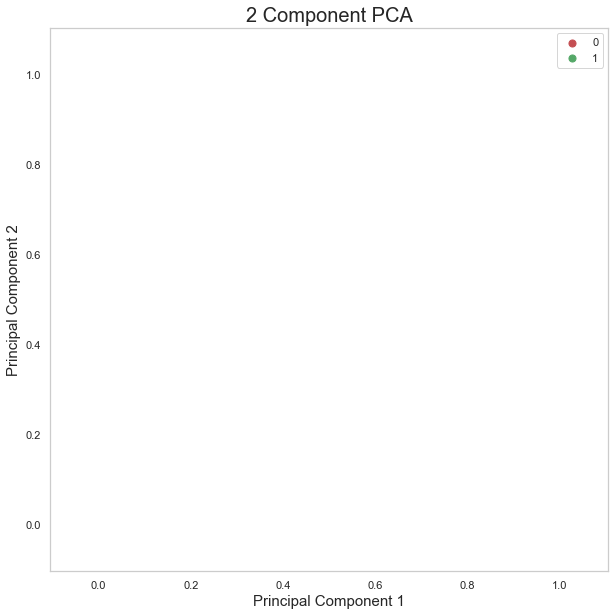

In [131]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['0','1']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['DEATH_EVENT'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [132]:
pca.explained_variance_ratio_

array([0.27310076, 0.21429933])

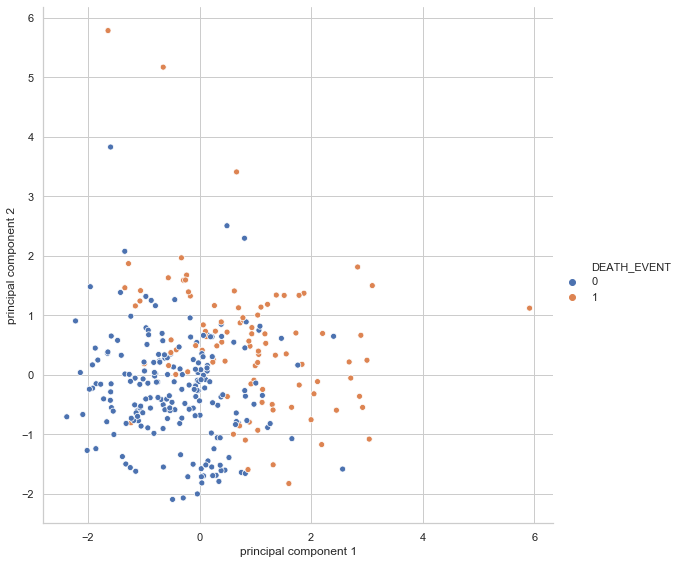

In [133]:
sns.set(style='whitegrid',color_codes='bool',rc={'figure.figsize':(12,12)})
sns.relplot('principal component 1', 'principal component 2',data=finalDf,hue="DEATH_EVENT",height=8)

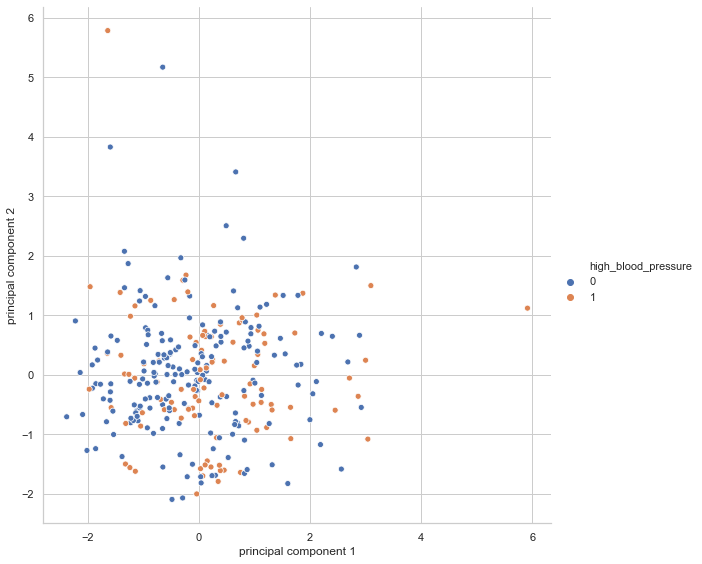

In [134]:
sns.set(style='whitegrid',color_codes='bool',rc={'figure.figsize':(12,12)})
sns.relplot('principal component 1', 'principal component 2',data=finalDf,hue="high_blood_pressure",height=8)

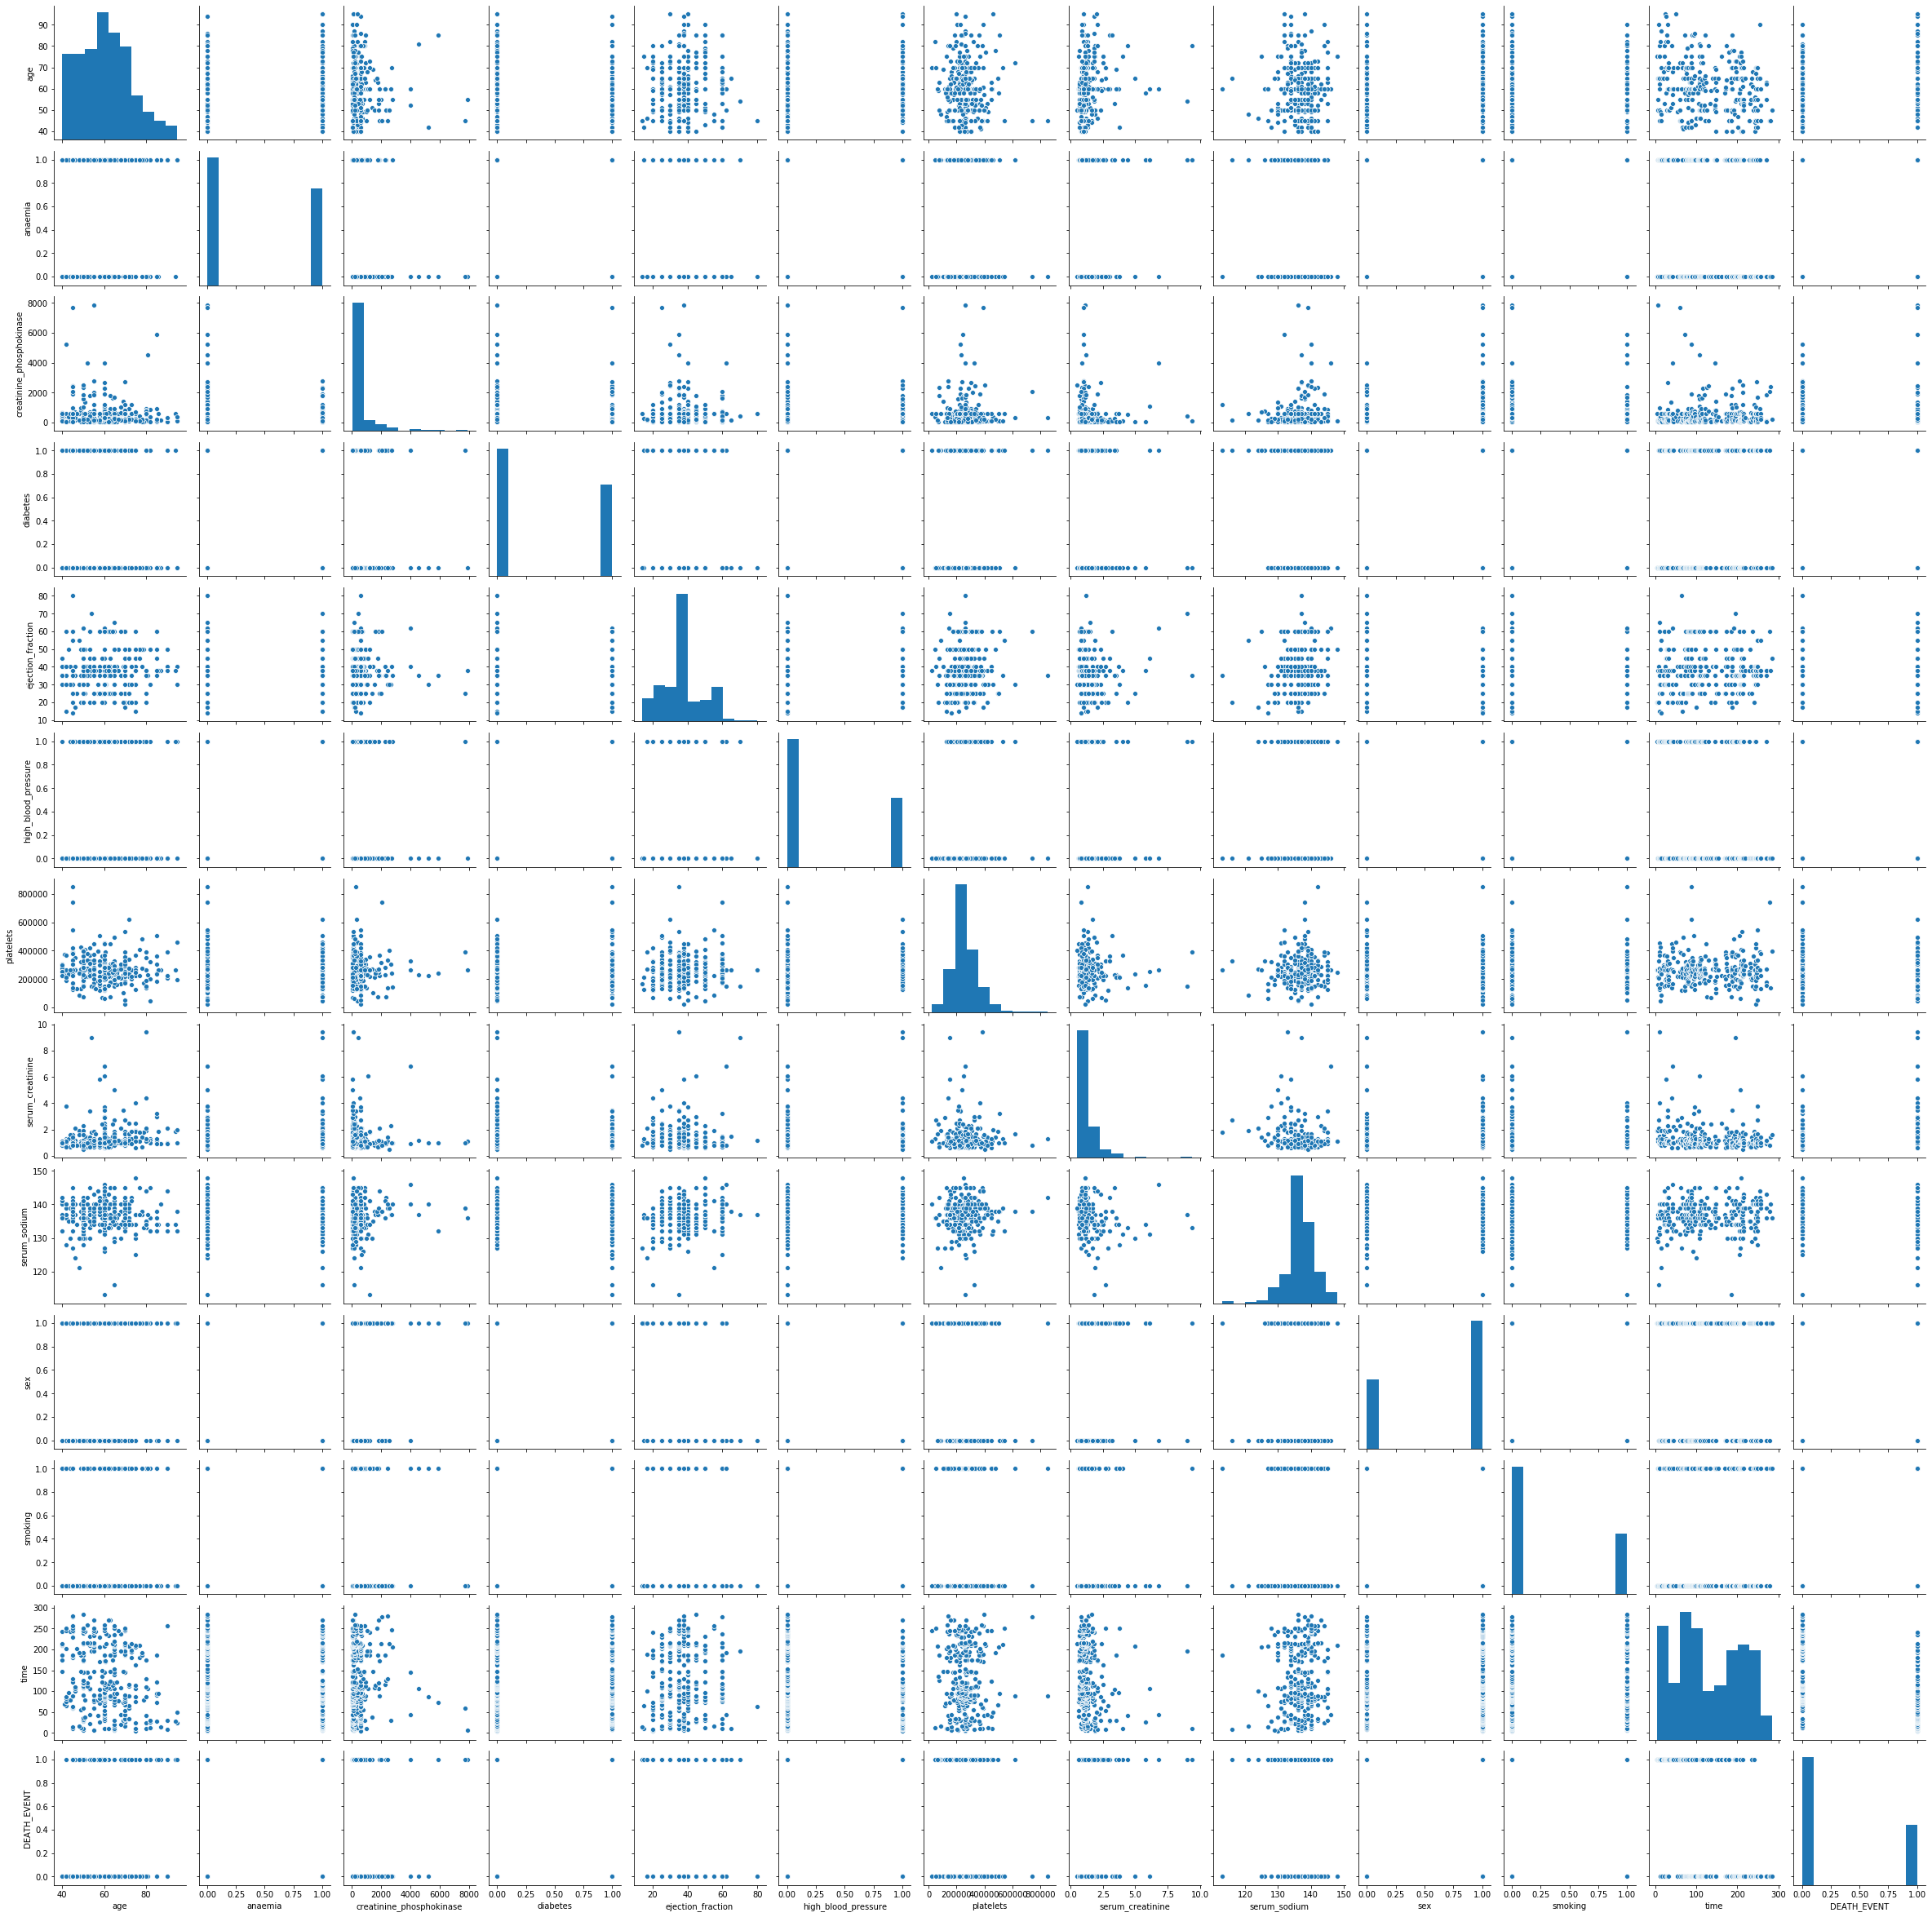

In [8]:
sns.pairplot(df)

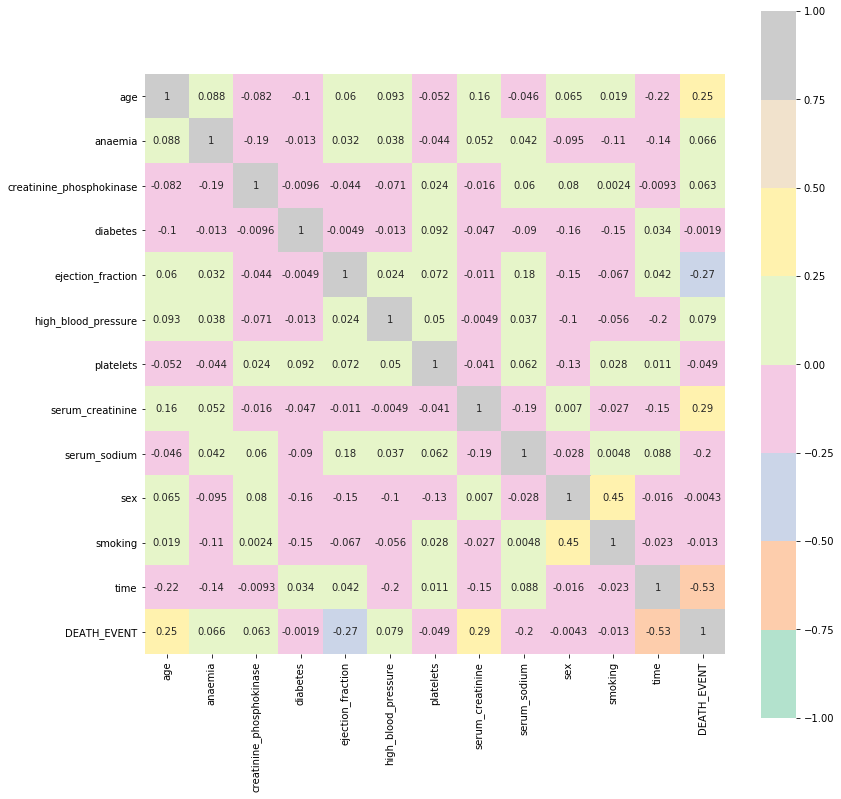

In [35]:
plt.subplots(figsize=(13,13))
sns.heatmap(df.corr(),annot=True, vmin=-1,square=True,cmap='Pastel2');

In this we can see a correlation between serum creatinine and the death event.

There is also a relation between age and sex with Death event (also sex and smoking). 

Lets look at serum creatinine

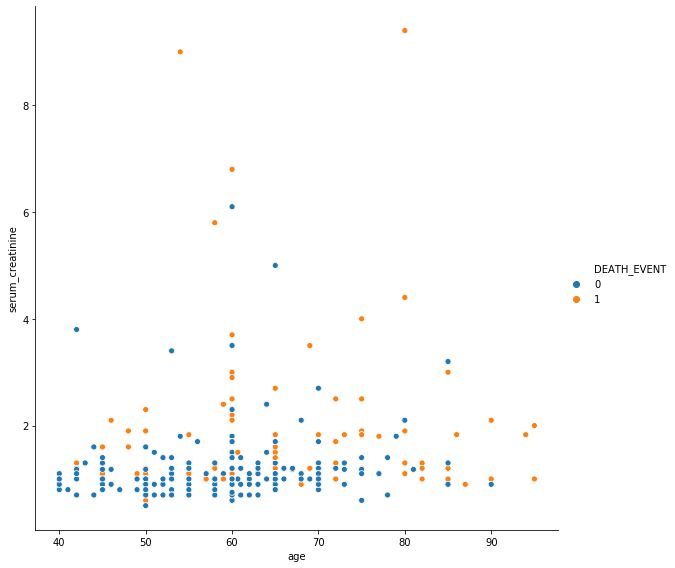

In [58]:
sns.relplot("age","serum_creatinine",hue="DEATH_EVENT",data=df,height=8)

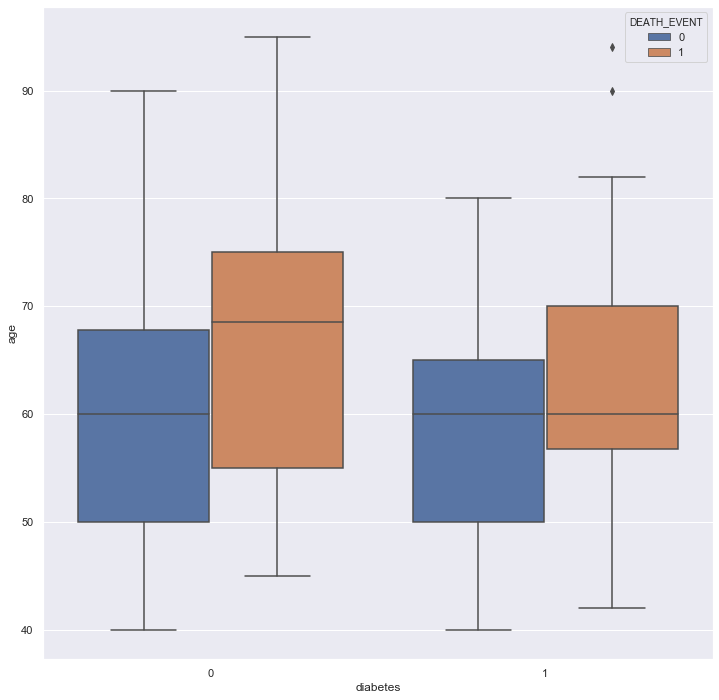

In [79]:
sns.set(rc={'figure.figsize':(12,12)})
sns.boxplot("diabetes","age",hue='DEATH_EVENT',data=df)

In [55]:
import plotly.express as px
fig = px.violin(df, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

In [56]:
fig = px.violin(df, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")
fig.show()

In [57]:
fig = px.histogram(df, "creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin",hover_data=df.columns)
fig.update_layout(title_text="Analysis in Creatinine Phosphokinase on Survival Status")
fig.show()

In [58]:
fig = px.histogram(df, "platelets", color="DEATH_EVENT", marginal="violin",hover_data=df.columns)
fig.update_layout(title_text="Analysis in platelet count on Survival Status")
fig.show()

In [59]:
fig = px.histogram(df, "time", color="DEATH_EVENT", marginal="violin",hover_data=df.columns)
fig.update_layout(title_text="Analysis in platelet count on Survival Status")
fig.show()

### Data Processing

In [60]:
finalDf.columns

Index(['principal component 1', 'principal component 2', 'anaemia', 'diabetes',
       'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [135]:
X=finalDf[['principal component 1','principal component 2','sex']]
y=finalDf['DEATH_EVENT']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Model Training

In [78]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

1. Logistic Regression

In [137]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

<Figure size 864x864 with 0 Axes>

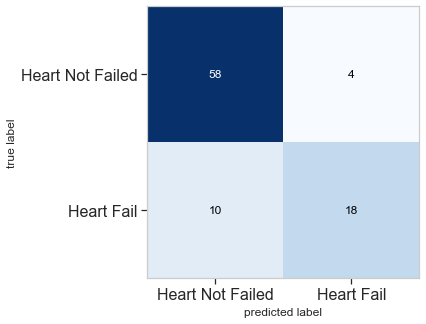

Accuracy score: 0.8444444444444444


In [138]:
accuracy_list=[]
accuracy_list.append(log_reg_acc*100)

cm = confusion_matrix(y_test,log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5),hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()
print("Accuracy score:",log_reg_acc)

2. Random Tree Forest

In [139]:
rf_class = RandomForestClassifier()
rf_class.fit(X_train,y_train)
rf_class_pred = rf_class.predict(X_test)
rf_class_acc = accuracy_score(y_test, rf_class_pred)

<Figure size 864x864 with 0 Axes>

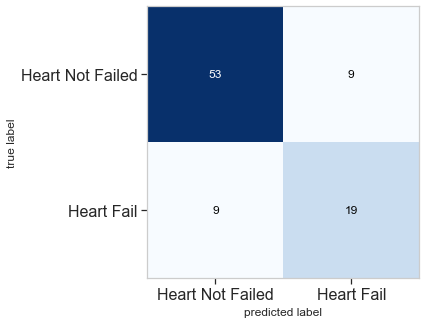

Accuracy score: 0.8


In [140]:
accuracy_list.append(rf_class_acc*100)

cm = confusion_matrix(y_test,rf_class_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5),hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()
print("Accuracy score:",rf_class_acc)

3. Decision Tree

In [141]:
dt_class = DecisionTreeClassifier()
dt_class.fit(X_train,y_train)
dt_class_pred = dt_class.predict(X_test)
dt_class_acc = accuracy_score(y_test, dt_class_pred)

<Figure size 864x864 with 0 Axes>

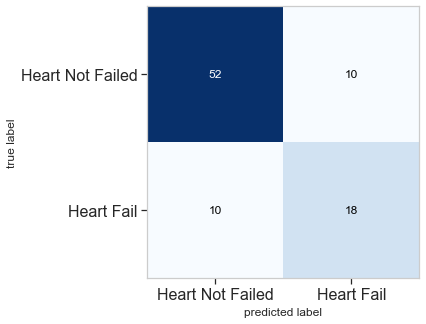

Accuracy score: 0.7777777777777778


In [142]:
accuracy_list.append(dt_class_acc*100)

cm = confusion_matrix(y_test,dt_class_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5),hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()
print("Accuracy score:",dt_class_acc)

4. Suppot Vector Classifier

In [143]:
sv_class = SVC()
sv_class.fit(X_train,y_train)
sv_class_pred = sv_class.predict(X_test)
sv_class_acc = accuracy_score(y_test, sv_class_pred)

<Figure size 864x864 with 0 Axes>

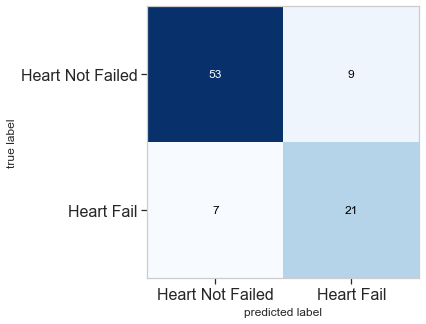

Accuracy score: 0.8222222222222222


In [144]:
accuracy_list.append(sv_class_acc*100)

cm = confusion_matrix(y_test,sv_class_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5),hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()
print("Accuracy score:",sv_class_acc)

5. K Nearest Neighbour

In [145]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test,knn_pred)

<Figure size 864x864 with 0 Axes>

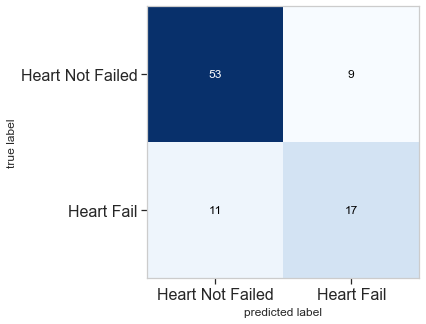

Accuracy score: 0.7777777777777778


In [146]:
accuracy_list.append(knn_acc*100)

cm = confusion_matrix(y_test,knn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5),hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()
print("Accuracy score:",knn_acc)

6. Gradient Boosting Classifier

In [147]:
gb_class = GradientBoostingClassifier()
gb_class.fit(X_train,y_train)
gb_class_pred = gb_class.predict(X_test)
gb_class_acc = accuracy_score(y_test,gb_class_pred)

<Figure size 864x864 with 0 Axes>

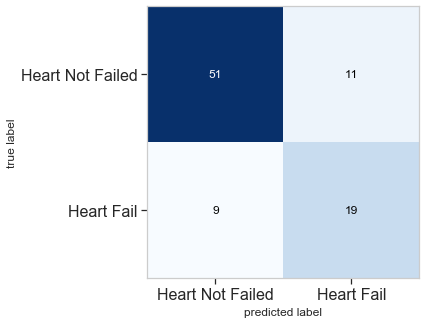

Accuracy score: 0.7777777777777778


In [148]:
accuracy_list.append(gb_class_acc*100)

cm = confusion_matrix(y_test,gb_class_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5),hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()
print("Accuracy score:",gb_class_acc)

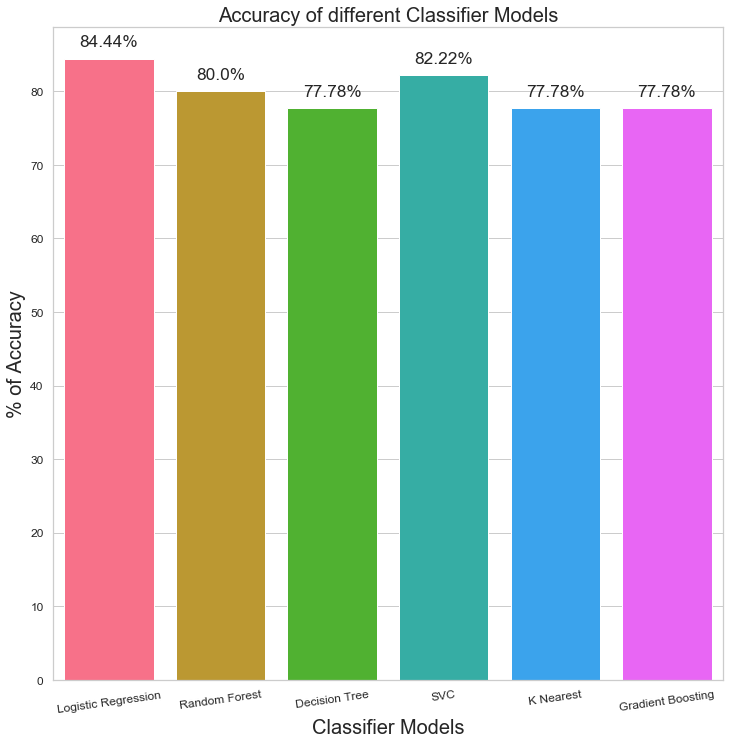

In [149]:
model_list = ['Logistic Regression','Random Forest','Decision Tree','SVC','K Nearest','Gradient Boosting']
plt.figure()
plt.rcParams['figure.figsize']=10,4
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()